In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [5]:
corpus = pd.read_csv('/Users/scavenger/Downloads/drug200.csv')

[23, 16, 16, 54, 91]


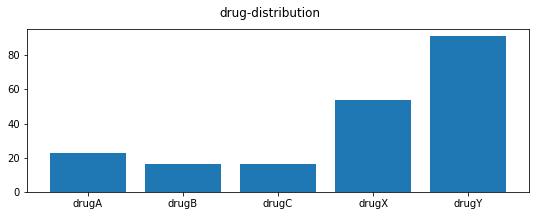

In [6]:
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
instances = [0, 0, 0, 0, 0]
for row in corpus.values:
    for i in range(len(classes)):
        if row[5] == classes[i]:
            instances[i] +=1
            
print(instances)
graph = plt.figure(figsize=(9,3))
plt.bar(classes,instances)
plt.suptitle('drug-distribution')
plt.show()
graph.savefig('drug-distribution.pdf', dpi=200)

In [7]:
numerical_corpus = pd.get_dummies(corpus, columns=['Sex'])

numerical_corpus.BP = pd.Categorical(numerical_corpus.BP, categories = ['LOW', 'NORMAL', 'HIGH'], ordered=True)
numerical_corpus.BP = numerical_corpus.BP.cat.codes

numerical_corpus.Cholesterol = pd.Categorical(numerical_corpus.Cholesterol,categories = ['NORMAL', 'HIGH'], ordered=True)
numerical_corpus.Cholesterol = numerical_corpus.Cholesterol.cat.codes

print(numerical_corpus)

     Age  BP  Cholesterol  Na_to_K   Drug  Sex_F  Sex_M
0     23   2            1   25.355  drugY      1      0
1     47   0            1   13.093  drugC      0      1
2     47   0            1   10.114  drugC      0      1
3     28   1            1    7.798  drugX      1      0
4     61   0            1   18.043  drugY      1      0
..   ...  ..          ...      ...    ...    ...    ...
195   56   0            1   11.567  drugC      1      0
196   16   0            1   12.006  drugC      0      1
197   52   1            1    9.894  drugX      0      1
198   23   1            0   14.020  drugX      0      1
199   40   0            0   11.349  drugX      1      0

[200 rows x 7 columns]


In [8]:
y = numerical_corpus.Drug
x = numerical_corpus.drop('Drug',axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

In [110]:
pred = []
nb = GaussianNB()
nb.fit(X_train,y_train)
pred.append(nb.predict(X_test))

bdt = DecisionTreeClassifier()
bdt.fit(X_train,y_train)
pred.append(bdt.predict(X_test)) 

params = {
    'criterion': ['entropy'], #gini,entropy
    'max_depth': [10], #10,20
    'min_samples_split': [20] #10,20,30
}

tdt = GridSearchCV(bdt,params)
tdt.fit(X_train,y_train)
pred.append(tdt.predict(X_test))

per = Perceptron()
per.fit(X_train,y_train)
pred.append(per.predict(X_test))

bmlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='logistic', 
    solver='sgd'
)
bmlp.fit(X_train,y_train)
pred.append(bmlp.predict(X_test))

params2 = {
    'activation': ['logistic'], #'logistic', 'tanh', 'relu', 'identity'
    'hidden_layer_sizes':(40,80), 
    'solver': ['sgd'] #'adam', sgd'
}
tmlp = GridSearchCV(bmlp,params2)
tmlp.fit(X_train,y_train)
pred.append(tmlp.predict(X_test))

/Users/scavenger/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/scavenger/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/scavenger/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/scavenger/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

In [111]:
with open('drugs-performance_temp.txt', 'a') as f:
    f.write('a)\n')
    f.write('**********Top-MLP, logistic, sgd, 40, 60, try 10**********\n')
    f.write('b)\n')
    f.write(
        np.array2string(
            metrics.confusion_matrix(y_test, pred[5]),
            separator=','
        )
    )
    f.write('\nc) and d)\n')
    f.write(
        classification_report(
            y_test,
            pred[5],
            target_names=classes
        )
    )
    

/Users/scavenger/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/scavenger/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/scavenger/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
